<a href="https://colab.research.google.com/github/AlexandreSaldanha/MVP_PUC_RIO/blob/main/MVP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Machine Learning - Problema de regressão**
---
**Treinando modelos de Regressão pra previsão do quantum de exportações do Brasil**

Os dados dos índices de quantum e preço básico foram coletados na Secretaria de Comércio Exterior do Ministério da Economia do Brasil. As informações da taxa de câmbio real efetiva e produção dos EUA são do portal do IPEADATA.

Agenda:
1 - Carga e preparação dos dados
2 - Separação entre treino e teste
3 - seleção de atributos
4 - modelagem
5 - avaliação e comparação de resultados dos modelos treinados.
5 - Predição.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

In [ ]:
# Imports necessários
url_dados = 'https://raw.githubusercontent.com/AlexandreSaldanha/AlexandreSaldanha/main/Dataset_Exportacoes'

dataset = pd.read_csv(url_dados,sep=';')
dataset.head()

,preço_basico,cambio_efetivo,Produçao_EUA,quantumexp
0,100,100,100,100
1,"99,95588884","100,4043796","102,4","96,92392706"
2,"98,83840612","101,4655202","103,6288","88,67194695"
3,"97,92677547","104,4258986","104,4578304","110,8491435"
4,"94,23614174","108,6177512","103,4132521","105,3416836"


In [ ]:
dataset['cambio_efetivo'] = dataset['cambio_efetivo'].apply(lambda x: str(x).replace(",","."))
dataset['Produçao_EUA'] = dataset['Produçao_EUA'].apply(lambda x: str(x).replace(",","."))
dataset['quantumexp'] = dataset['quantumexp'].apply(lambda x: str(x).replace(",","."))
dataset['preço_basico'] = dataset['preço_basico'].apply(lambda x: str(x).replace(",","."))

In [ ]:
dataset['preço_basico'].astype('float64')
dataset['cambio_efetivo'].astype('float64')
dataset['Produçao_EUA'].astype('float64')
dataset['quantumexp'].astype('float64')

0      100.000000
1       96.923927
2       88.671947
3      110.849143
4      105.341684
          ...    
140    211.162277
141    190.219193
142    209.357156
143    197.384417
144    189.740284
Name: quantumexp, Length: 145, dtype: float64

In [ ]:
# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:3] # atributos
y = array[:,3] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=3)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:3])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:3]))


Número original de atributos: 3

Número reduzido de atributos: 3

Atributos Originais: Index(['preço_basico', 'cambio_efetivo', 'Produçao_EUA'], dtype='object')

Scores dos Atributos Originais: [nan nan nan]

Atributos Selecionados: ['preço_basico' 'cambio_efetivo' 'Produçao_EUA']


In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:3])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:3]))

Atributos Originais: Index(['preço_basico', 'cambio_efetivo', 'Produçao_EUA'], dtype='object')

Atributos Selecionados: [ True  True  True]

Ranking de atributos: [1 1 1]

Qtd de melhores Atributos: 3

Nomes dos Atributos Selecionados: ['preço_basico' 'cambio_efetivo' 'Produçao_EUA']


In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['preço_basico', 'cambio_efetivo', 'Produçao_EUA', 'quantumexp'], dtype='object')
[0.344 0.325 0.331]


In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

In [ ]:
# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [ ]:
# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

LR: MSE 599.29 (190.17) - RMSE 24.48
Ridge: MSE 599.29 (190.17) - RMSE 24.48
Lasso: MSE 599.31 (189.77) - RMSE 24.48
KNN: MSE nan (nan) - RMSE nan
CART: MSE 592.19 (242.04) - RMSE 24.33
SVM: MSE 954.94 (463.61) - RMSE 30.90


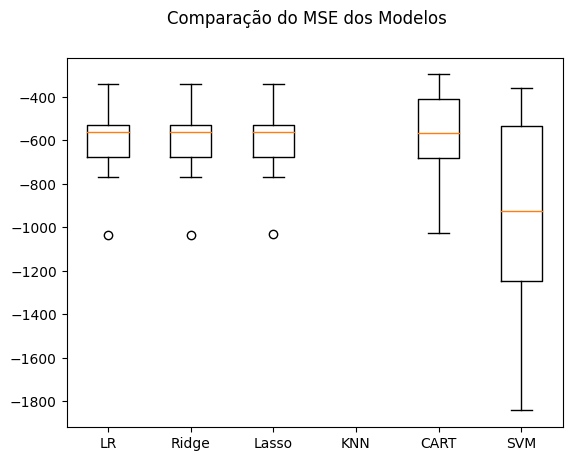

In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE, o RMSE e o R2 no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print("R2 %0.2f" % r2_score(y_test, predictions))

MSE 358.88
RMSE 18.94
R2 0.48


[129.734 203.051 138.576 135.619 169.769 171.305 195.988 189.977 175.965
 182.744 195.634 196.203 137.555 171.579 170.12  172.485 196.778 146.207
 146.583 193.515 137.436 167.882 168.804 187.97  183.017 197.785 140.282
 142.66  184.265]


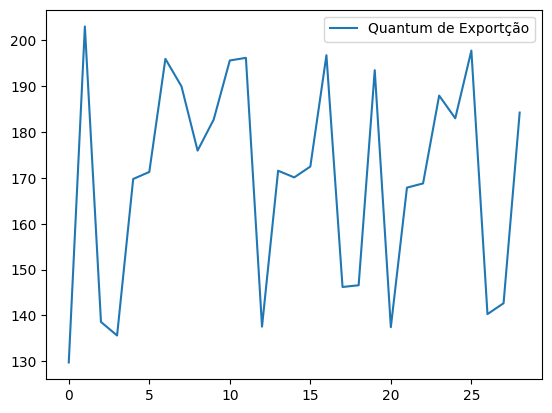

In [ ]:
# Mostrando os valores preditos
print (predictions)
plt.plot(predictions, label = "Quantum de Exportção")
plt.legend()
plt.show()

**Conclusão**

---
O modelo de regressão linear mostrou o melhor desempenho, principalmente analisando o resultado no conjuto de teste, onde o MSE e RMSE foram menores do que no conjunto de treinamento.
Contudo, o R2=0.48, indica que apenas 48% das variações do quantum de exportação são explicadas pelo preço básico, câmbio real efetiva e produção dos EUA.



# **MVP - Deep Learning - Visão computacional**
---
**Construindo um classificador de imagem com uma rede neural de camada única no PyTorch**

Para isso foi utilizado o conjuto de dados CIFAR-10 (Fonte: https://www.cs.toronto.edu/~kriz/cifar.html).

São 60.000 imagens coloridas de 32×32 pixels. Estruturadas em 10 classes, com 6.000 imagens por classe. Divididas em 50.000 imagens de treinamento e 10.000 imagens de teste.

Agenda: 1 - Carga e preparação dos dados
2 - Separação entre treino e teste
3 - modelagem
4 - avaliação e comparação de resultados dos modelos treinados.
5 - Predição.


In [ ]:
# Imports necessários
import torch
import torchvision
import torchvision.transforms as transforms

# importando dataset do CIFAR-10 e separando entre treino e teste
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:01<00:00, 101534104.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Criando o objeto de dados
dataset = 'Data()'

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 100) # Camada totalmente conectada com 100 neurônios ocultos
        self.fc2 = nn.Linear(100, num_classes) # Camada totalmente conectada com saídas num_classes

    def forward(self, x):
        x = x.view(-1, 32*32*3) # Remodelar o tensor de entrada
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Instanciando o modelo
model = SimpleNet()

In [ ]:
# Carregando os dados no PyTorch DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Definindo a função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:

# treinando o modelo
num_epochs = 20
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

# Loop através do número de epochs
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    # definindo o modo de treinamento
    model.train()
    # instruindo sobre os dados de treinamento
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #calculo de perda
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    # calcular a acurácia e perda média do treinamento
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc /= len(train_loader.dataset)
    train_acc_history.append(train_acc)

    # definindo o modelo para o modo de avaliação
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.argmax(1) == labels).sum().item()

    # Calcula a acurácia e perda média de validação
    val_loss /= len(test_loader)
    val_loss_history.append(val_loss)
    val_acc /= len(test_loader.dataset)
    val_acc_history.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

Epoch 1/20, train loss: 1.8916, train acc: 0.3198, val loss: 1.7599, val acc: 0.3654
Epoch 2/20, train loss: 1.7314, train acc: 0.3857, val loss: 1.7164, val acc: 0.3885
Epoch 3/20, train loss: 1.6708, train acc: 0.4065, val loss: 1.6710, val acc: 0.4072
Epoch 4/20, train loss: 1.6277, train acc: 0.4219, val loss: 1.6122, val acc: 0.4278
Epoch 5/20, train loss: 1.6011, train acc: 0.4359, val loss: 1.5960, val acc: 0.4375
Epoch 6/20, train loss: 1.5872, train acc: 0.4387, val loss: 1.6041, val acc: 0.4320
Epoch 7/20, train loss: 1.5633, train acc: 0.4449, val loss: 1.5689, val acc: 0.4443
Epoch 8/20, train loss: 1.5485, train acc: 0.4525, val loss: 1.5663, val acc: 0.4421
Epoch 9/20, train loss: 1.5333, train acc: 0.4562, val loss: 1.5792, val acc: 0.4300
Epoch 10/20, train loss: 1.5261, train acc: 0.4585, val loss: 1.5281, val acc: 0.4630
Epoch 11/20, train loss: 1.5115, train acc: 0.4637, val loss: 1.5478, val acc: 0.4520
Epoch 12/20, train loss: 1.5018, train acc: 0.4685, val loss: 1

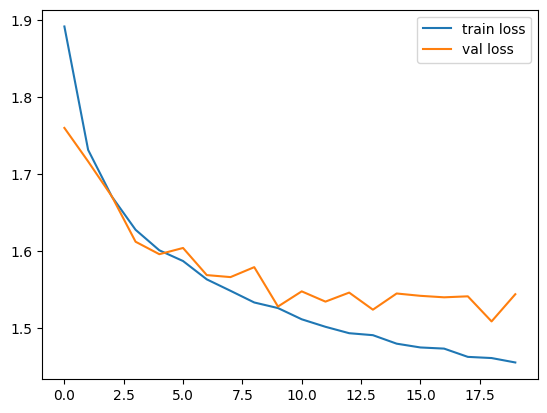

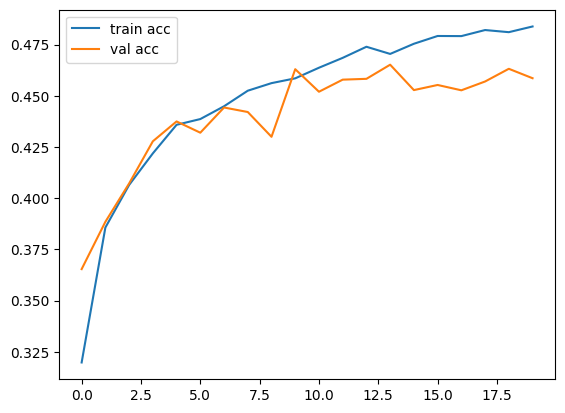

In [ ]:
# Grafico de treno e validação
plt.plot(train_loss_history, label='train loss')
plt.plot(val_loss_history, label='val loss')
plt.legend()
plt.show()

# Grafico de treno e validação
plt.plot(train_acc_history, label='train acc')
plt.plot(val_acc_history, label='val acc')
plt.legend()
plt.show()

True Labels:  tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])
Predicted Labels:  tensor([6, 9, 0, 0, 4, 6, 3, 6, 2, 1, 0, 9, 5, 7, 1, 8, 5, 2, 8, 7, 4, 2, 0, 1,
        4, 6, 6, 0, 9, 6, 6, 4, 4, 3, 9, 1, 3, 9, 3, 5, 0, 6, 3, 6, 0, 9, 6, 0,
        4, 6, 9, 2, 6, 3, 8, 0, 5, 1, 3, 2, 7, 3, 7, 5])


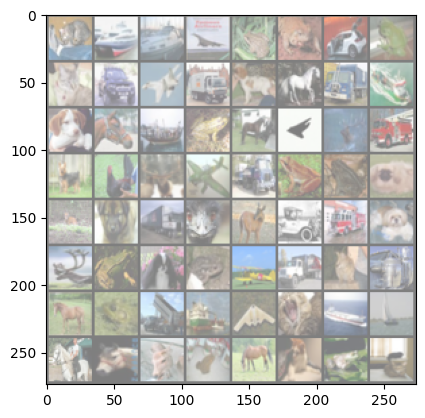

In [ ]:
import numpy as np

# Obtendo dados de validação
for inputs, labels in test_loader:
    break

# Fazendo predição
outputs = model(inputs)
_, predicted = torch.max(outputs, 1)

# Exibindo as imagens e os rótulos
img_grid = torchvision.utils.make_grid(inputs)
img_grid = img_grid / 2 + 0.5
npimg = img_grid.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

print('True Labels: ', labels)
print('Predicted Labels: ', predicted)

**Conclusão**

---
Uma rede neural de camada única se mostra não ideal para todas as etapas, mas pode ser boa como um classificador simples e útil para entender o funcionamento interno da rede neural.
